prediction model for profit of 50_startups data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [5]:
from google.colab import files
upload=files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [80]:
df=pd.read_csv('50_Startups.csv')

In [81]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [8]:
df.shape

(50, 5)

In [9]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [11]:
df[df.duplicated()]  
# no data is duplicated

,R&D Spend,Administration,Marketing Spend,State,Profit


In [51]:
#corerlation analysis
# correlation matrix
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


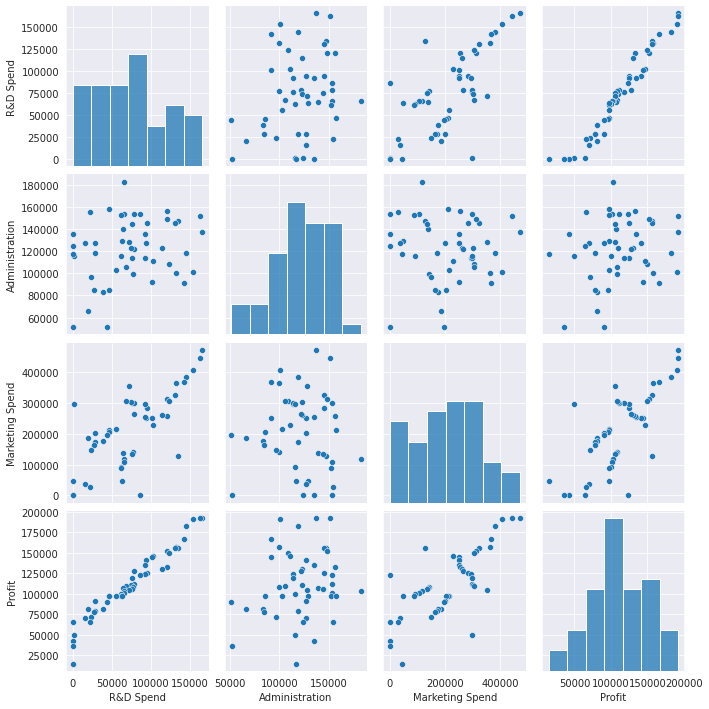

In [52]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [88]:
df = df.rename({'R&D Spend' : 'RD_spend', 'Marketing Spend' : 'Marketing_spend' },axis = 1)
df.head()

,RD_spend,Administration,Marketing_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [99]:
#model building
model1 = smf.ols('Profit~RD_spend+Administration+Marketing_spend',data=df).fit()

In [100]:
model1.params

Intercept          50122.192990
RD_spend               0.805715
Administration        -0.026816
Marketing_spend        0.027228
dtype: float64

In [101]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           4.53e-30
Time:                        07:54:40   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD_spend            0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
# the administration is insignificant and hence ,
#individual linear regression models is created for Administration and Marketing spend


In [103]:
# SLR for Administration
slr_a = smf.ols('Profit~Administration',data=pt).fit()

In [104]:
slr_a.summary()
# Administartion is insignificant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Mon, 27 Feb 2023   Prob (F-statistic):              0.162
Time:                        07:54:45   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
slr_m = smf.ols('Profit~Marketing_spend',data=df).fit()

In [110]:
slr_m.summary()
# marketing spend has significant value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           4.38e-10
Time:                        07:55:25   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept            6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing_spend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [114]:
mlr_am=smf.ols('Profit~Administration+Marketing_spend',data=df).fit()

In [115]:
mlr_am.summary()
# both Administration and Markting spend has significant values
# but the R-squared:	0.610 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           2.50e-10
Time:                        07:55:56   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Administration      0.3237      0.131      2.468      0.017       0.060       0.588
Marketing_spend     0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [132]:
# validating model
# two techniques  1.VIF   2. Residual analysis
#1.Vif
rsq_Administration = smf.ols('Administration~RD_spend+Marketing_spend',data=df).fit().rsquared  
vif_Administration = 1/(1-rsq_Administration)

rsq_RD_spend = smf.ols('RD_spend~Administration+Marketing_spend',data=df).fit().rsquared  
vif_RD_spend = 1/(1-rsq_RD_spend)

rsq_Marketing_spend = smf.ols('Marketing_spend~RD_spend+Administration',data=df).fit().rsquared  
vif_Marketing_spend = 1/(1-rsq_Marketing_spend)

# Storing vif values in a data frame
d1 = {'Variables':['Administration','RD_spend','Marketing_spend'],'VIF':[vif_Administration,vif_RD_spend,vif_Marketing_spend]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Administration,1.175091
1,RD_spend,2.468903
2,Marketing_spend,2.326773


In [133]:
# all the VIF values are less than 20 and hence all the variables are taken into consideration

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


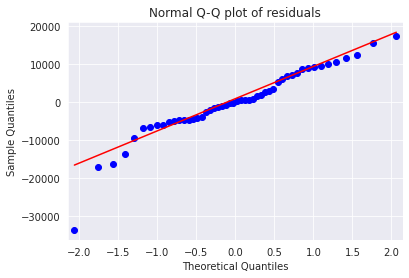

In [136]:
## 2. Residual analysis
#Test for Normality of Residuals (Q-Q Plot)
qqplot=sm.qqplot(model1.resid,line='q') # line ='q'  is the 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [139]:
list(np.where(model1.resid<-20000))
# the index no 49 is to be taken into consideration

[array([49])]

In [28]:
#Residual Plot for Homoscedasticity or hetroscedasticity
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()  # ei vs fitted values

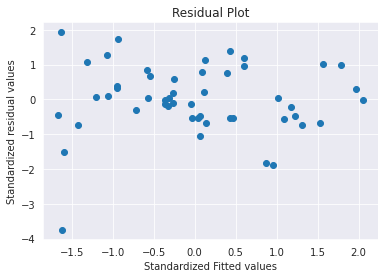

In [140]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()
# no pattern and hence no problems

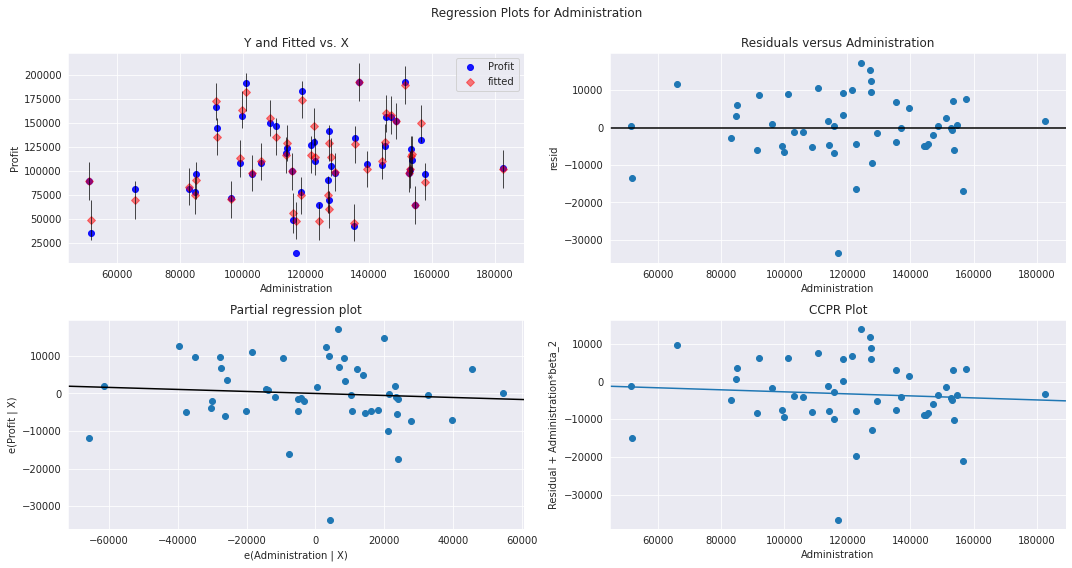

In [141]:
# regressor vs Residuals
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Administration", fig=fig)
plt.show()

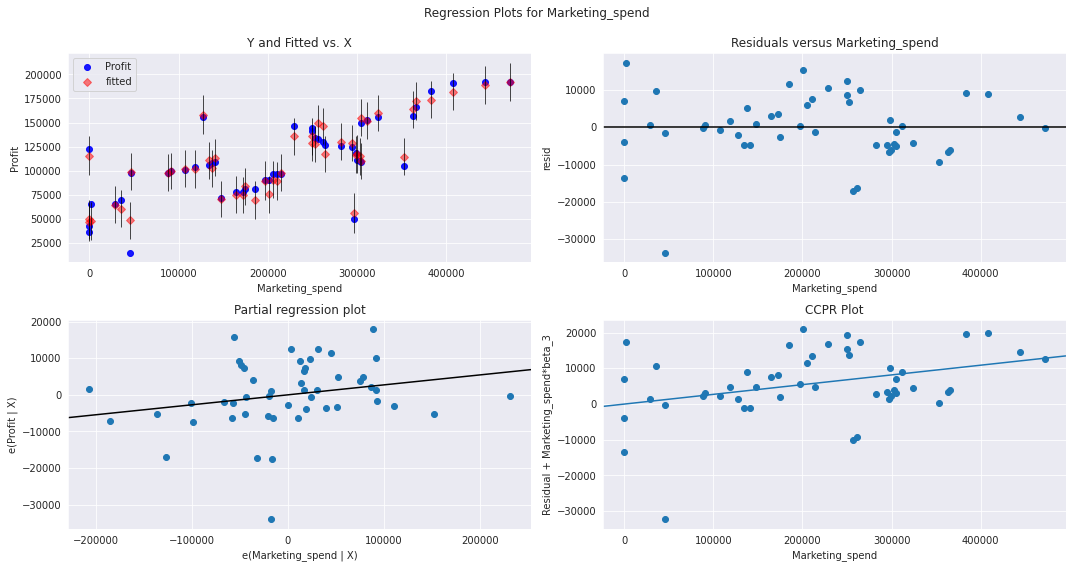

In [142]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Marketing_spend", fig=fig)
plt.show()

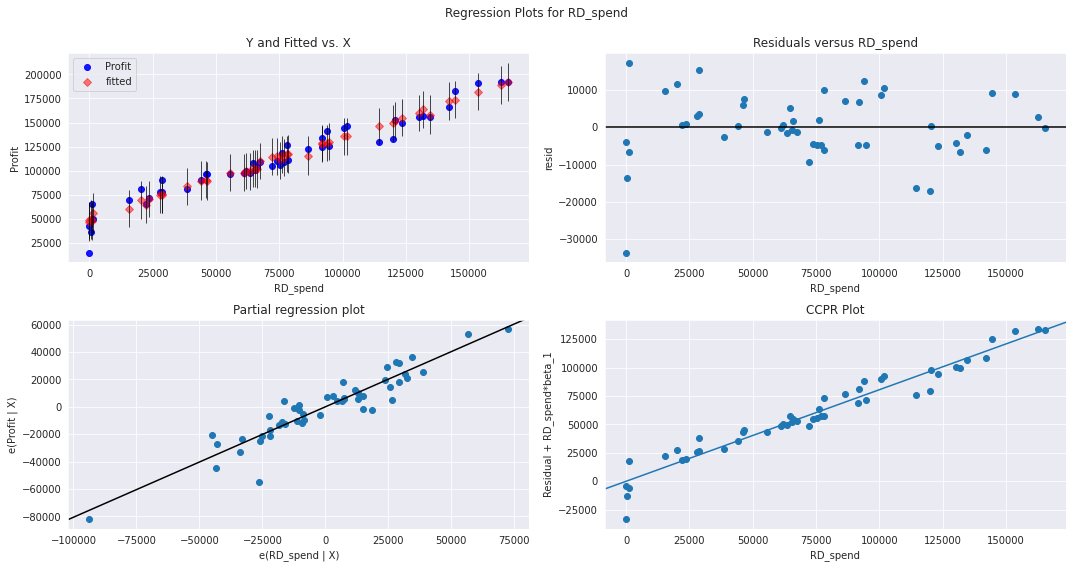

In [144]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "RD_spend", fig=fig)
plt.show()

In [145]:
#model deletion diagonistics 
#detection of outliers/influencres
#cooks distance
model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance 

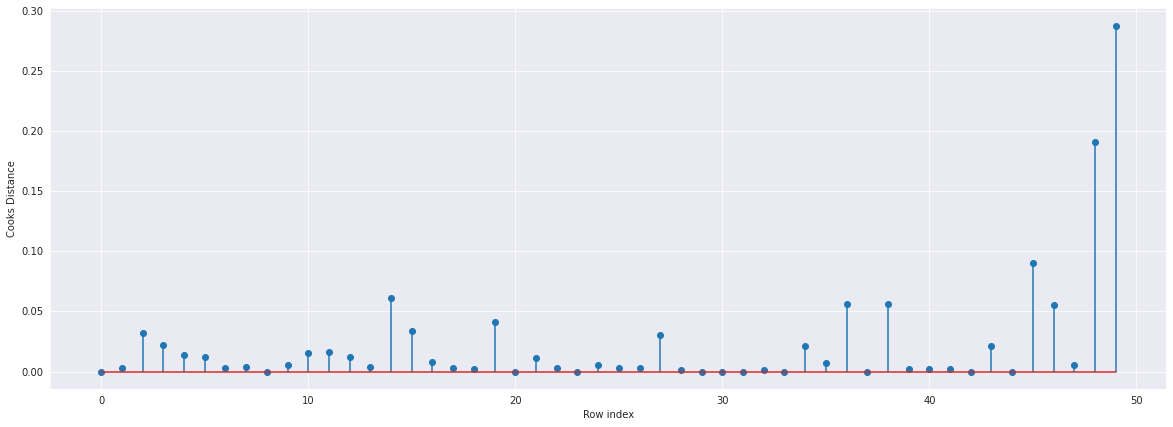

In [147]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [148]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

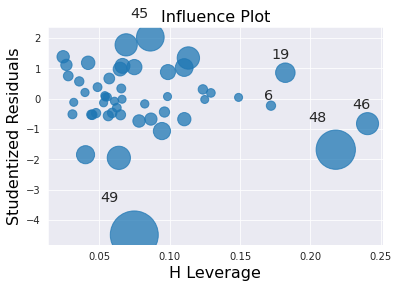

In [150]:
#high influence points
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

In [151]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff


0.36

In [152]:
#from the above plot it is evident that the value 49 is the influencer
df[df.index.isin([49])]

,RD_spend,Administration,Marketing_spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [155]:
#imporoving the model
df_new=pd.read_csv('50_Startups.csv')

In [156]:
df_new.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [157]:
df1=df_new.drop(df_new.index[[49]],axis=0).reset_index()

In [158]:
#Drop the original index
df1=df1.drop(['index'],axis=1)

In [159]:
df1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [165]:
df1 = df1.rename({'R&D Spend' : 'RD_spend', 'Marketing Spend' : 'Marketing_spend' },axis = 1)
df1.head()

,RD_spend,Administration,Marketing_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [166]:
#model building
model2 = smf.ols('Profit~RD_spend+Administration+Marketing_spend',data=df1).fit()

In [167]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           8.85e-32
Time:                        08:28:51   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RD_spend            0.7830      0.038     20.470      0.000       0.706       0.860
Administration     -0.0222      0.043     -0.518      0.607      -0.109       0.064
Marketing_spend     0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [168]:
#final model is model2
(model2.rsquared,model2.aic)

(0.9613162435129847, 1020.5652974526367)

In [171]:
#model predictions
#x=input("enter the R&D spend:")
#y=input("enter the Administration spend :")
#z=input("enter the Marketing spend:")
new_data=pd.DataFrame({'RD_spend':150000,'Administration':100000,'Marketing_spend':400000},index=[1])
new_data

,RD_spend,Administration,Marketing_spend
1,150000,100000,400000


In [172]:
model2.predict(new_data)

1    177706.033198
dtype: float64

In [174]:
model2.predict(df1.iloc[0:5,])

0    190716.676999
1    187537.122227
2    180575.526396
3    172461.144642
4    170863.486721
dtype: float64

preparation of a prediction model for predicting Price.


In [55]:
#Consider only the below columns and prepare a prediction model for predicting Price.
#Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


In [200]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [58]:
from google.colab import files
upload=files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla.csv


In [201]:
df=pd.read_csv("ToyotaCorolla.csv",encoding='latin1')

In [202]:
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [203]:
df.shape


(1436, 38)

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [206]:
df1=pd.concat([df.iloc[:,2:4],df.iloc[:,6:7],df.iloc[:,8:9],df.iloc[:,12:14],df.iloc[:,15:18]],axis=1)
df1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [207]:
df2=df1.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT','Weight':'WT'},axis=1)
df2

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [208]:
df2[df2.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
113,24950,8,13253,116,2000,5,5,234,1320


In [209]:
df3=df2.drop_duplicates()#.reset_index()
df3

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [210]:
df3.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [211]:
#corerlation analysis
# correlation matrix
df3.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
WT,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


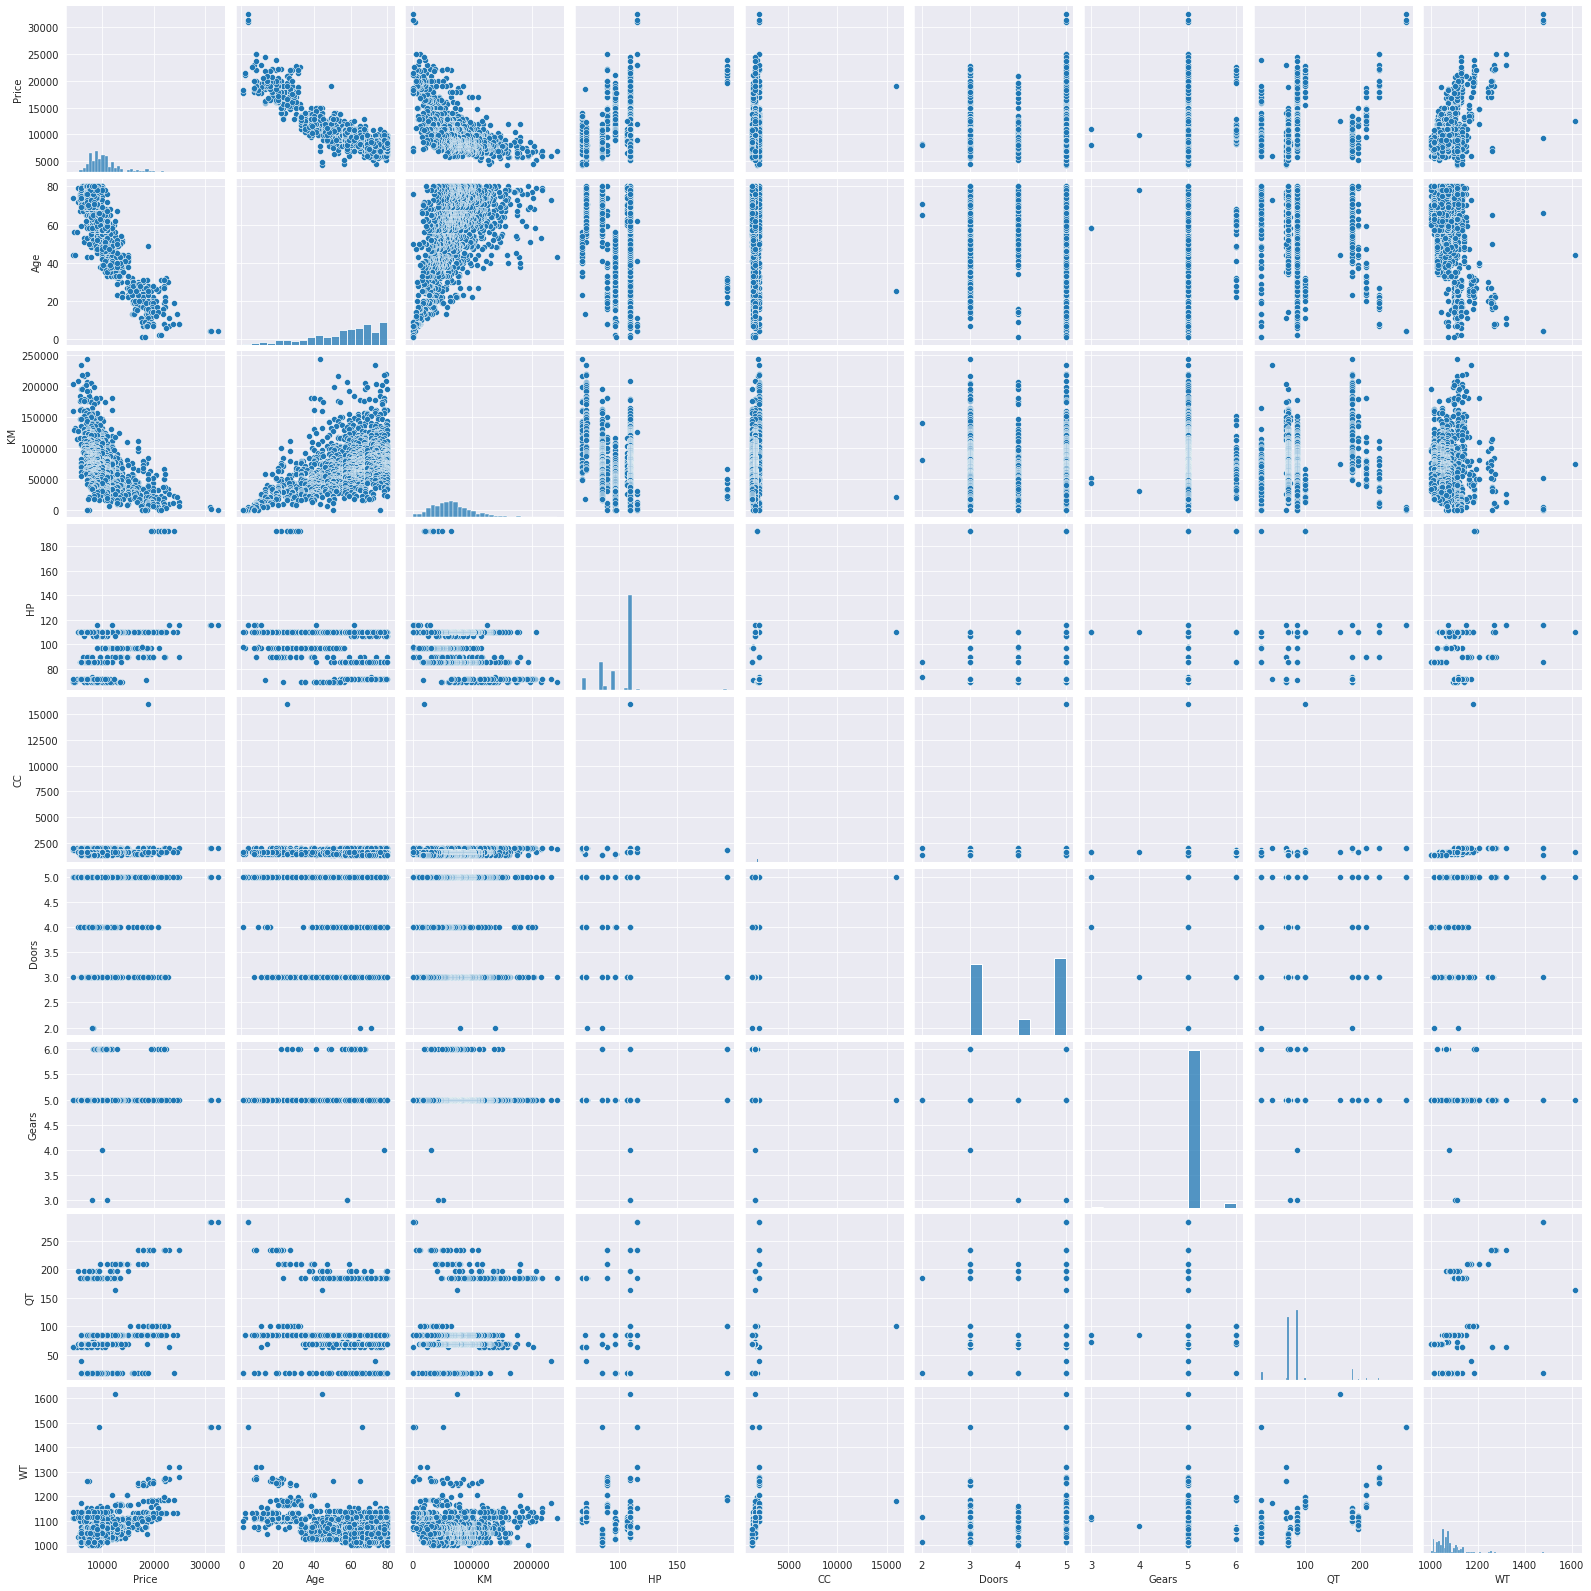

In [212]:
sns.set_style(style='darkgrid')
sns.pairplot(df3)
plt.show()

In [213]:
#model building
model1 = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+WT',data=df3).fit()

In [214]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        08:56:02   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
WT            16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [215]:
#door and cc is insignificant values
#individual linear regression models is created for door and cc

In [216]:
# SLR for Administration
slr_d = smf.ols('Price~Doors',data=df3).fit()
slr_d.summary()
#doors have significant values

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           2.40e-12
Time:                        08:56:02   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [217]:
slr_c = smf.ols('Price~CC',data=df3).fit()
slr_c.summary()
#cc has significant pvalues

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           2.29e-06
Time:                        08:56:04   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
CC             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [218]:
mlr_c = smf.ols('Price~CC+Doors',data=df3).fit()
mlr_c.summary()
#cc and doors has significant pvalues

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           2.55e-15
Time:                        08:56:05   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
CC             0.9398      0.220      4.268      0.000       0.508       1.372
Doors        662.3187     98.089      6.752      0.000     469.906     854.732
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

model validation techniques
1.collinearity check

In [219]:
rsq_Age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+WT',data=df3).fit().rsquared
vif_Age=1/(1-rsq_Age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+WT',data=df3).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+WT',data=df3).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+WT',data=df3).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_Doors=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+WT',data=df3).fit().rsquared
vif_Doors=1/(1-rsq_Doors)

rsq_Gears=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+WT',data=df3).fit().rsquared
vif_Gears=1/(1-rsq_Gears)

rsq_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+WT',data=df3).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('WT~Age+KM+HP+CC+Doors+Gears+QT',data=df3).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Storing vif values in a data frame
d1 = {'Variables':['Age','KM','HP','CC','Doors','Gears','QT','WT'],'VIF':[vif_Age,vif_KM,vif_HP,vif_CC,vif_Doors,vif_Gears,vif_QT,vif_WT]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame



,Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,WT,2.487180


In [220]:
# all the VIF values are less than 20 and hence all the variables are taken into consideration

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


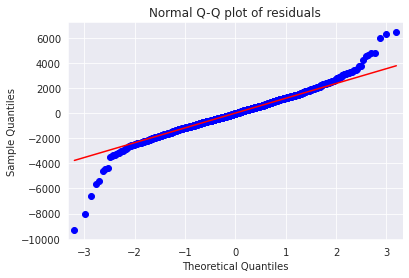

In [221]:
## 2. Residual analysis
#Test for Normality of Residuals (Q-Q Plot)
qqplot=sm.qqplot(model1.resid,line='q') # line ='q'  is the 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [222]:
list(np.where(model1.resid<-6000))

[array([220, 600, 959])]

In [223]:
list(np.where(model1.resid>6000))


[array([109, 146, 522])]

In [224]:
#Residual Plot for Homoscedasticity or hetroscedasticity
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std() 

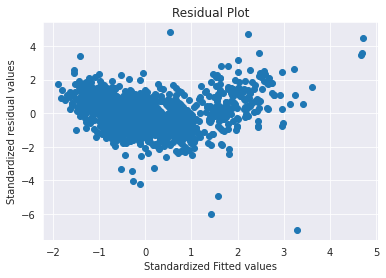

In [225]:
    plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()
# no pattern and hence no problems

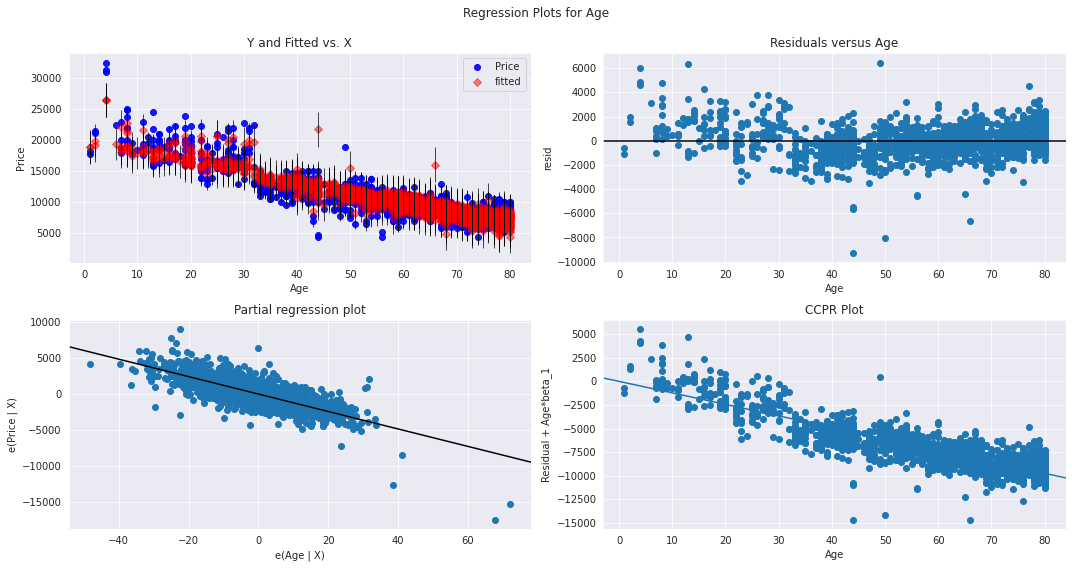

In [226]:
# regressor vs Residuals
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Age", fig=fig)
plt.show()

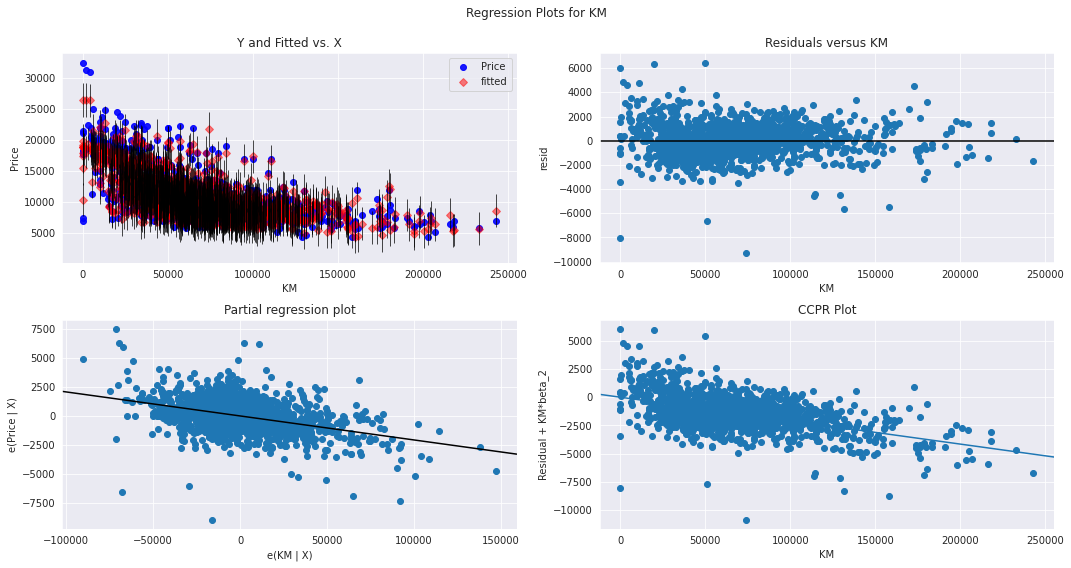

In [227]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1,'KM',fig=fig)
plt.show()

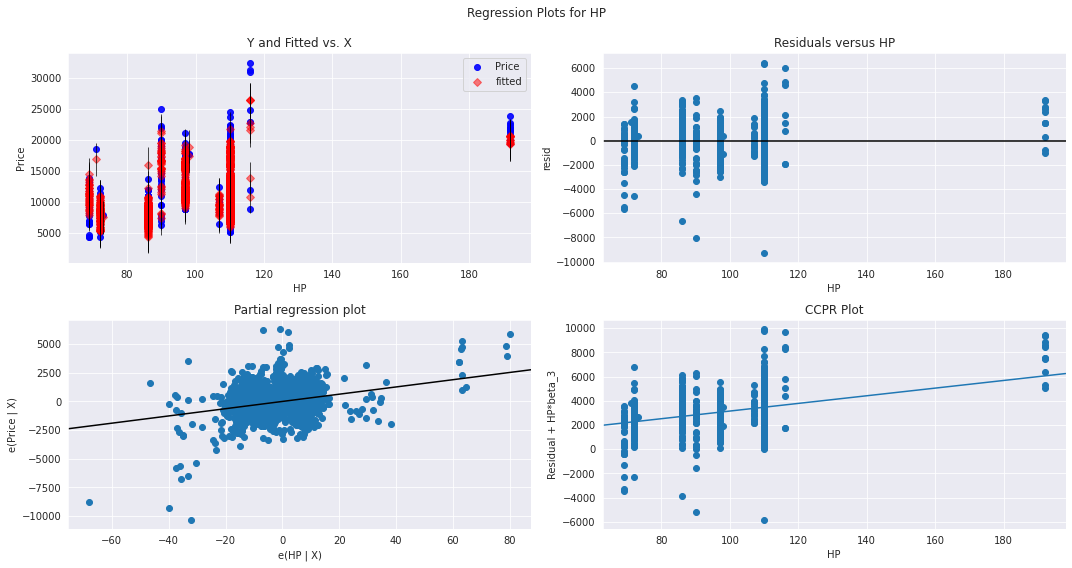

In [228]:

fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1,'HP',fig=fig)
plt.show()

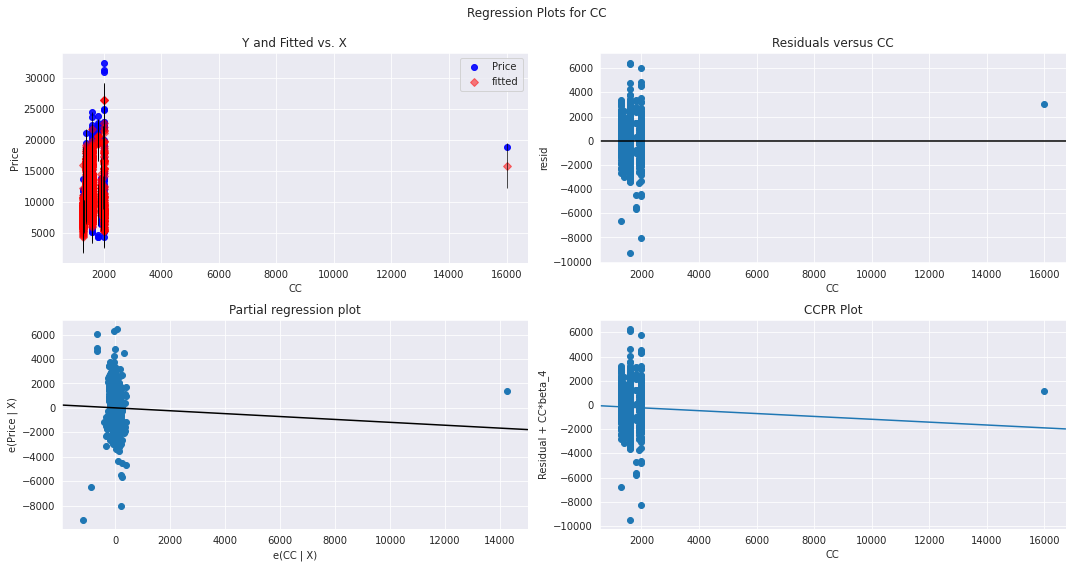

In [229]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1,'CC',fig=fig)
plt.show()

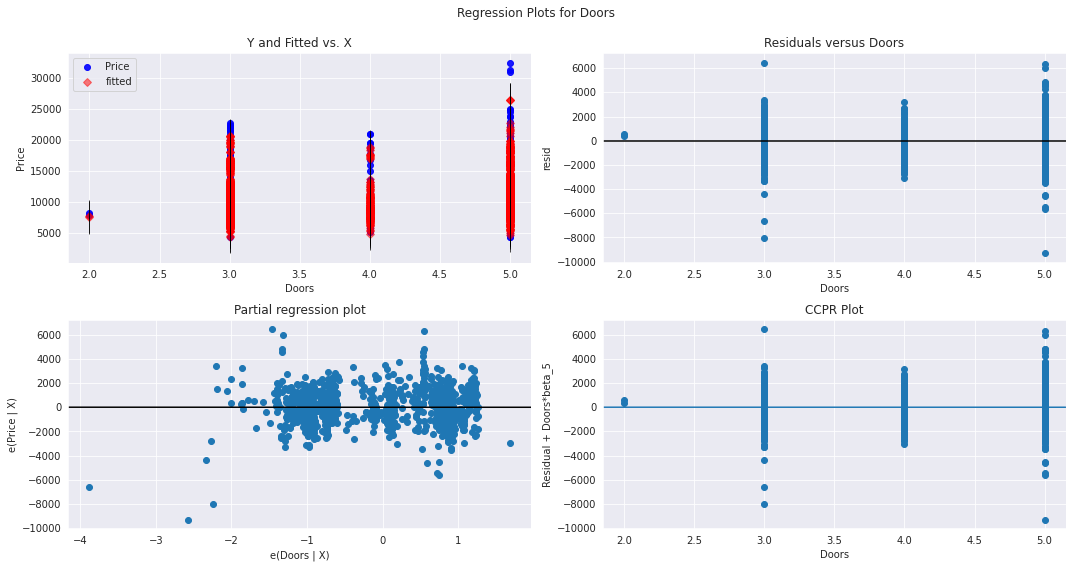

In [230]:

fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1,'Doors',fig=fig)
plt.show()


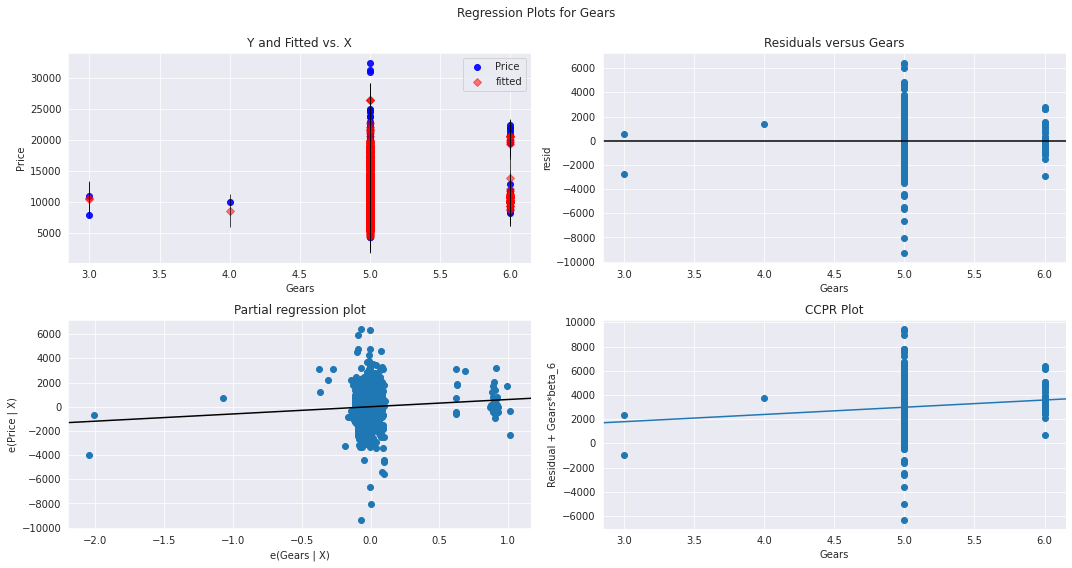

In [231]:

fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1,'Gears',fig=fig)
plt.show()

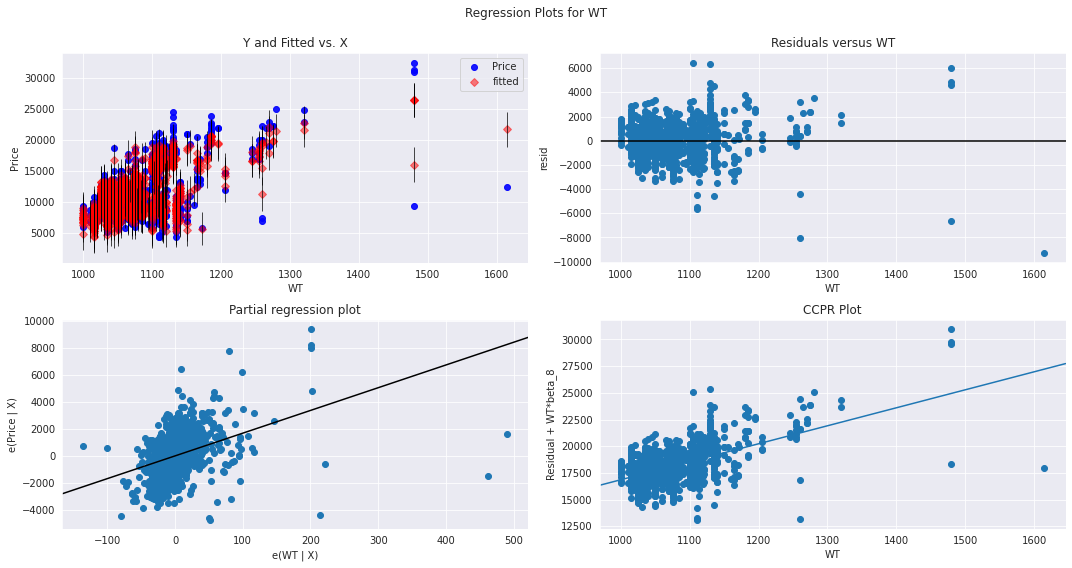

In [232]:

fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1,'WT',fig=fig)
plt.show()

model deletion diagonistics

detection of outliers/influencres


In [233]:
#cooks distance
model_influence=model1.get_influence()
(c, _) = model_influence.cooks_distance 

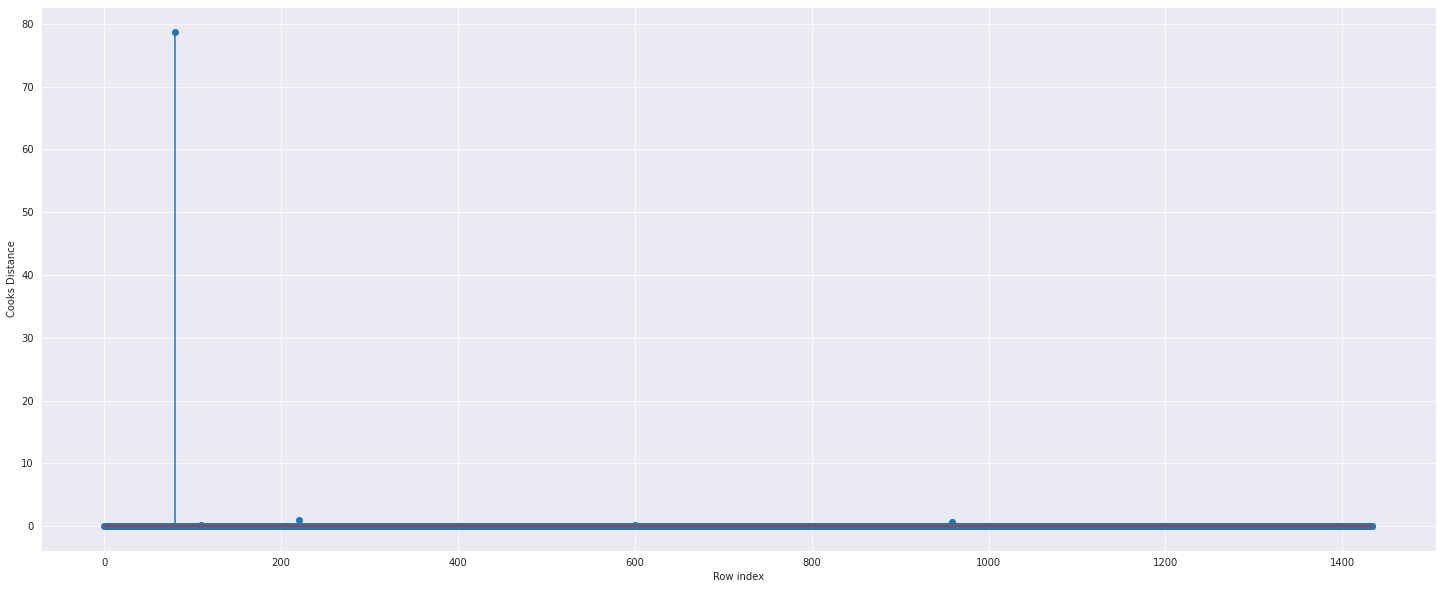

In [249]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(25,10))
plt.stem(np.arange(len(df3)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [235]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 78.72950582258932)

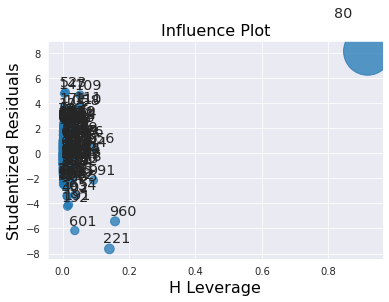

In [236]:
#high influence points
influence_plot(model1)
plt.show()

In [238]:
k = df3.shape[1]
n = df3.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020905923344947737

In [239]:
df3[df3.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
80,18950,25,20019,110,16000,5,5,100,1180


In [240]:
#imporoving the model
df_new=df3.copy()

In [241]:
df=df_new.drop(df_new.index[[80,109,146,220,522,600,959]],axis=0).reset_index(drop=True)

In [242]:
df

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1423,7500,69,20544,86,1300,3,5,69,1025
1424,10845,72,19000,86,1300,3,5,69,1015
1425,8500,71,17016,86,1300,3,5,69,1015
1426,7250,70,16916,86,1300,3,5,69,1015


In [243]:
model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+WT',data=df).fit()

In [244]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1410.
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        08:58:02   Log-Likelihood:                -12130.
No. Observations:                1428   AIC:                         2.428e+04
Df Residuals:                    1419   BIC:                         2.432e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.529e+04   1420.135    -10.767      0.000   -1.81e+04   -1.25e+04
Age         -110.4694      2.415    -45.747      0.000    -115.206    -105.732
KM            -0.0176      0.001    -15.177      0.000      -0.020      -0.015
HP            34.5657      2.664     12.973      0.000      29.339      39.792
CC            -3.6194      0.295    -12.263      0.000      -4.198      -3.040
Doors       -131.6843     36.380     -3.620      0.000    -203.049     -60.320
Gears        487.0311    174.379      2.793      0.005     144.962     829.100
QT             4.2733      1.343      3.182      0.001       1.639       6.908
WT            31.0485      1.304     23.804      0.000      28.490      33.607
==============================================================================
Omnibus:                       44.290   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.263
Skew:                          -0.016   Prob(JB):                     6.91e-25
Kurtosis:                       4.367   Cond. No.                     3.55e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.55e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [245]:
new_data=pd.DataFrame({'Age':30,'KM':40000,'HP':90,'CC':2000,'Doors':3,'Gears':5,'QT':210,'WT':1200},index=[1])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,WT
1,30,40000,90,2000,3,5,210,1200


In [246]:
model.predict(new_data)

1    16758.528787
dtype: float64

In [248]:
model.predict(df.iloc[0:5,])

0    16322.071900
1    15864.990261
2    16304.512464
3    15972.803954
4    15853.494748
dtype: float64